In [15]:
from PaperTennis_env import PaperTennisEnv
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
import os.path
from os import path
import scipy.io

In [16]:
#Hyperparms
GAMMA = 0.9
ALPHA = 0.1
E_GREEDY = 0.1

Startegies = {
    "Mean": 1,
    "Long": 2,
    "Short": 3,
    "Rand": 4,
}

In [69]:
# Run Parms !!!!!
NUM_EPISODES = 5000000
Strategy_Shift = 100000

# Generate Opponent Startegy
OPP_Strat = np.around(np.random.uniform(0,3,int(NUM_EPISODES/Strategy_Shift))+1)
OPP_Strat = np.repeat(OPP_Strat, Strategy_Shift)


Q_val = np.zeros([5,51,51,50])



In [70]:
# Get action e-greedy
def get_action(state,Q_val):
    if state[1] == 0:
        return 0

    p_epsilon = np.random.uniform(0,1)
    if p_epsilon < E_GREEDY:
        return np.argmax(np.random.uniform(0,1,(1,state[1]))) + 1

    q_s = np.zeros(state[1])

    for i in range(1,state[1]):
        q_s[i] = Q_val[state[0],state[1],state[2],i]

    return np.argmax(q_s) + 1

In [71]:
start_time = time.time()

# init env
env = PaperTennisEnv()

# Plotting Stuff
trend_wins = np.zeros(NUM_EPISODES-100)
trend_TD = np.zeros(NUM_EPISODES-100)
cum_reward = np.zeros(NUM_EPISODES+1)

wins = np.zeros(NUM_EPISODES)
td_error = np.zeros(NUM_EPISODES)

for episode in range(NUM_EPISODES):

    env.reset()
    state = env.state
    done = False

    action = get_action(state,Q_val)

    # Generate an episode
    error_episode = 0
    while not done:

        state_prime, reward, done = env.step(action,OPP_Strat[episode])

        action_prime = get_action(state_prime,Q_val)

        # SARSA tabular update (Section 6.5 S.B., psuedocode)
        TD_error = (reward + GAMMA * Q_val[state_prime[0],state_prime[1],state_prime[2],action_prime-1]
            -Q_val[state[0],state[1],state[2],action-1])

        Q_val[state[0],state[1],state[2],action-1] = Q_val[state[0],state[1],state[2],action-1] + ALPHA*TD_error

        error_episode += abs(TD_error)

        state  = state_prime
        action = action_prime

        if (done and reward == 1):
            wins[episode] = 1
            

    td_error[episode] = error_episode
    if episode >= 100:
        trend_wins[episode-100] = np.sum(wins[episode-100:episode])
        trend_TD[episode-100] = np.sum(td_error[episode-100:episode])
    
    if episode%10000 == 0: print("Episode %d completed with reward %d" % (episode, reward))

# # Update total episode count
# train_episodes += episode +1 
        
# # Save Q-val Table and episode count
# pickle.dump([train_episodes,Q_val], open(OPP_Strat + '.p', "wb" ) )

# Print run details
print("--- %s seconds ---" % (time.time() - start_time))
print("Final mean win percent = %s " % (np.mean(trend_wins[-10000:])))
print("Total mean win percent = %s " % (np.mean(trend_wins)))

Episode 0 completed with reward -1
Episode 10000 completed with reward 1
Episode 20000 completed with reward 1
Episode 30000 completed with reward 1
Episode 40000 completed with reward 1
Episode 50000 completed with reward 1
Episode 60000 completed with reward 1
Episode 70000 completed with reward -1
Episode 80000 completed with reward 1
Episode 90000 completed with reward 1
Episode 100000 completed with reward 1
Episode 110000 completed with reward -1
Episode 120000 completed with reward 1
Episode 130000 completed with reward 1
Episode 140000 completed with reward -1
Episode 150000 completed with reward -1
Episode 160000 completed with reward 1
Episode 170000 completed with reward -1
Episode 180000 completed with reward -1
Episode 190000 completed with reward 1
Episode 200000 completed with reward -1
Episode 210000 completed with reward 1
Episode 220000 completed with reward 1
Episode 230000 completed with reward 1
Episode 240000 completed with reward 1
Episode 250000 completed with r

Episode 2070000 completed with reward 1
Episode 2080000 completed with reward 1
Episode 2090000 completed with reward 1
Episode 2100000 completed with reward 1
Episode 2110000 completed with reward 1
Episode 2120000 completed with reward 1
Episode 2130000 completed with reward 1
Episode 2140000 completed with reward 1
Episode 2150000 completed with reward 1
Episode 2160000 completed with reward 1
Episode 2170000 completed with reward 1
Episode 2180000 completed with reward 1
Episode 2190000 completed with reward 1
Episode 2200000 completed with reward 1
Episode 2210000 completed with reward 1
Episode 2220000 completed with reward 1
Episode 2230000 completed with reward -1
Episode 2240000 completed with reward -1
Episode 2250000 completed with reward 1
Episode 2260000 completed with reward 1
Episode 2270000 completed with reward 1
Episode 2280000 completed with reward 1
Episode 2290000 completed with reward 1
Episode 2300000 completed with reward 1
Episode 2310000 completed with reward 

Episode 4120000 completed with reward 1
Episode 4130000 completed with reward 1
Episode 4140000 completed with reward -1
Episode 4150000 completed with reward 1
Episode 4160000 completed with reward 1
Episode 4170000 completed with reward 1
Episode 4180000 completed with reward 1
Episode 4190000 completed with reward 1
Episode 4200000 completed with reward 1
Episode 4210000 completed with reward 1
Episode 4220000 completed with reward 1
Episode 4230000 completed with reward 1
Episode 4240000 completed with reward -1
Episode 4250000 completed with reward 1
Episode 4260000 completed with reward 1
Episode 4270000 completed with reward 1
Episode 4280000 completed with reward 1
Episode 4290000 completed with reward 1
Episode 4300000 completed with reward 1
Episode 4310000 completed with reward 1
Episode 4320000 completed with reward 1
Episode 4330000 completed with reward 1
Episode 4340000 completed with reward -1
Episode 4350000 completed with reward 1
Episode 4360000 completed with reward

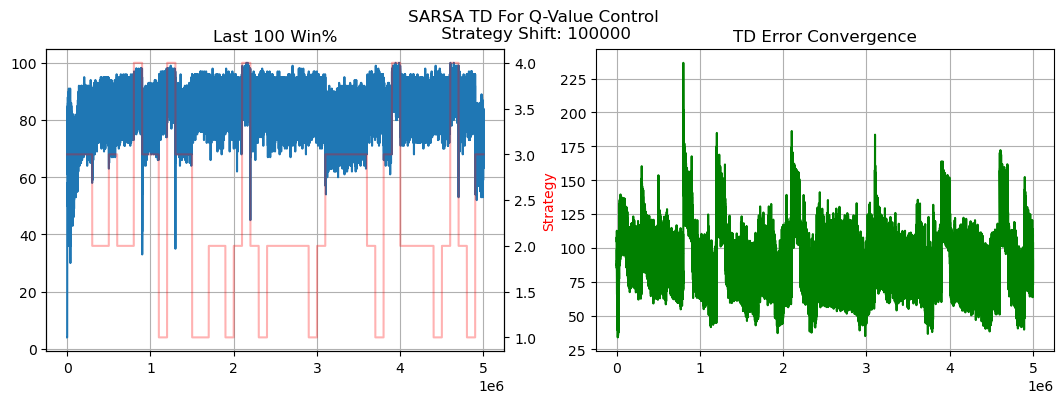

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13,4), dpi= 100, facecolor='w', edgecolor='k')
ax3 = ax1.twinx()
ax1.plot(range(100,NUM_EPISODES),trend_wins)
ax3.plot(range(100,NUM_EPISODES),OPP_Strat[100:] , 'r-',alpha=0.3)
ax2.plot(range(100,NUM_EPISODES),trend_TD,c='g')
ax1.title.set_text("Last 100 Win%")
ax2.title.set_text("TD Error Convergence")
fig.suptitle('SARSA TD For Q-Value Control\n Strategy Shift: ' + str(Strategy_Shift))
ax3.set_ylabel('Strategy', color='r')
# ax1.set_xscale('log')
# ax2.set_xscale('log')
ax1.grid()
ax2.grid()

In [75]:
# Matlab export

scipy.io.savemat('StrategySim/Multi.mat', mdict={'Q_val': Q_val})

In [81]:
from seaborn import heatmap
plt.rcParams['figure.figsize'] = [20,20]

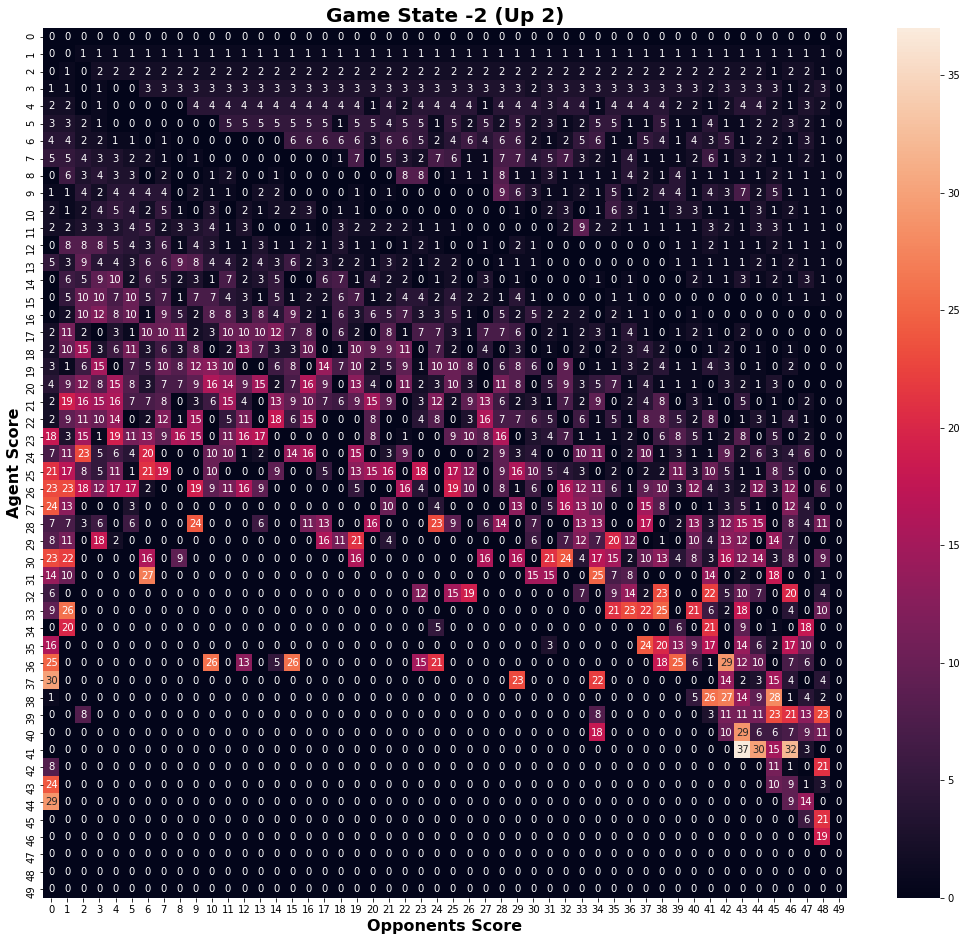

In [109]:
V_a = np.zeros((50,50))
for i in range(0,50):
    for j in range(0,50):
        V_a[i,j] = np.argmax(Q_val[3,i,j,:])


ax = heatmap(V_a, annot=True, linewidths=0)
plt.title('Game State -2 (Up 2)',fontweight='bold',fontsize = 20)
plt.xlabel("Opponents Score",fontweight='bold',fontsize = 16)
plt.ylabel("Agent Score",fontweight='bold',fontsize = 16)
plt.show()

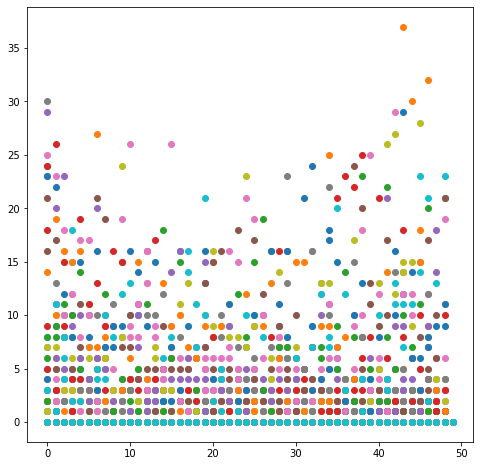

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

for i in range(0,50):
    axes.scatter(range(0,50),V_a[i,:])